## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9960599	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9774658	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9574201	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9402131	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9220066	total: 62.8ms	remaining: 12.5s
5:	learn: 0.9047112	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8878884	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8715725	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8565513	total: 66.3ms	remaining: 7.3s
9:	learn: 0.8400035	total: 67.2ms	remaining: 6.66s
10:	learn: 0.8247873	total: 68ms	remaining: 6.12s
11:	learn: 0.8106027	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7951926	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7802017	total: 70.5ms	remaining: 4.96s
14:	learn: 0.7684342	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7548581	total: 72.1ms	remaining: 4.44s
16:	learn: 0.7413094	total: 72.9ms	remaining: 4.22s
17:	learn: 0.7277804	total: 73.7ms	remaining: 4.02s
18:	learn: 0.7149112	total: 74.4ms	remaining: 3

60:	learn: 0.4187159	total: 109ms	remaining: 1.68s
61:	learn: 0.4150570	total: 110ms	remaining: 1.66s
62:	learn: 0.4118571	total: 111ms	remaining: 1.65s
63:	learn: 0.4076522	total: 112ms	remaining: 1.63s
64:	learn: 0.4044079	total: 113ms	remaining: 1.63s
65:	learn: 0.4006462	total: 114ms	remaining: 1.61s
66:	learn: 0.3968089	total: 115ms	remaining: 1.6s
67:	learn: 0.3927706	total: 116ms	remaining: 1.58s
68:	learn: 0.3897284	total: 116ms	remaining: 1.57s
69:	learn: 0.3868848	total: 117ms	remaining: 1.56s
70:	learn: 0.3831217	total: 118ms	remaining: 1.54s
71:	learn: 0.3800082	total: 119ms	remaining: 1.53s
72:	learn: 0.3771418	total: 120ms	remaining: 1.52s
73:	learn: 0.3742990	total: 121ms	remaining: 1.51s
74:	learn: 0.3712245	total: 122ms	remaining: 1.5s
75:	learn: 0.3683372	total: 122ms	remaining: 1.49s
76:	learn: 0.3648898	total: 123ms	remaining: 1.48s
77:	learn: 0.3622828	total: 124ms	remaining: 1.47s
78:	learn: 0.3592430	total: 125ms	remaining: 1.46s
79:	learn: 0.3568189	total: 126ms

158:	learn: 0.2459070	total: 192ms	remaining: 1.01s
159:	learn: 0.2451769	total: 193ms	remaining: 1.01s
160:	learn: 0.2445302	total: 194ms	remaining: 1.01s
161:	learn: 0.2439222	total: 194ms	remaining: 1s
162:	learn: 0.2434900	total: 195ms	remaining: 1s
163:	learn: 0.2428800	total: 196ms	remaining: 999ms
164:	learn: 0.2420734	total: 197ms	remaining: 995ms
165:	learn: 0.2412384	total: 197ms	remaining: 992ms
166:	learn: 0.2407621	total: 198ms	remaining: 990ms
167:	learn: 0.2400479	total: 199ms	remaining: 987ms
168:	learn: 0.2394183	total: 200ms	remaining: 985ms
169:	learn: 0.2388292	total: 201ms	remaining: 982ms
170:	learn: 0.2382388	total: 202ms	remaining: 979ms
171:	learn: 0.2376223	total: 203ms	remaining: 976ms
172:	learn: 0.2370658	total: 204ms	remaining: 976ms
173:	learn: 0.2363624	total: 205ms	remaining: 973ms
174:	learn: 0.2355452	total: 206ms	remaining: 971ms
175:	learn: 0.2350171	total: 207ms	remaining: 968ms
176:	learn: 0.2346032	total: 208ms	remaining: 965ms
177:	learn: 0.2339

286:	learn: 0.1789823	total: 300ms	remaining: 745ms
287:	learn: 0.1785252	total: 301ms	remaining: 744ms
288:	learn: 0.1781588	total: 302ms	remaining: 742ms
289:	learn: 0.1776674	total: 303ms	remaining: 741ms
290:	learn: 0.1773004	total: 303ms	remaining: 739ms
291:	learn: 0.1768566	total: 304ms	remaining: 738ms
292:	learn: 0.1766234	total: 305ms	remaining: 736ms
293:	learn: 0.1759929	total: 306ms	remaining: 735ms
294:	learn: 0.1756650	total: 307ms	remaining: 733ms
295:	learn: 0.1753647	total: 307ms	remaining: 731ms
296:	learn: 0.1751003	total: 308ms	remaining: 729ms
297:	learn: 0.1744747	total: 309ms	remaining: 728ms
298:	learn: 0.1742629	total: 310ms	remaining: 726ms
299:	learn: 0.1739491	total: 310ms	remaining: 724ms
300:	learn: 0.1735607	total: 311ms	remaining: 723ms
301:	learn: 0.1730742	total: 312ms	remaining: 721ms
302:	learn: 0.1728333	total: 313ms	remaining: 720ms
303:	learn: 0.1723695	total: 314ms	remaining: 718ms
304:	learn: 0.1720531	total: 315ms	remaining: 717ms
305:	learn: 

384:	learn: 0.1483091	total: 382ms	remaining: 610ms
385:	learn: 0.1480083	total: 383ms	remaining: 609ms
386:	learn: 0.1475471	total: 384ms	remaining: 608ms
387:	learn: 0.1472659	total: 385ms	remaining: 607ms
388:	learn: 0.1470368	total: 385ms	remaining: 605ms
389:	learn: 0.1468233	total: 386ms	remaining: 604ms
390:	learn: 0.1466919	total: 387ms	remaining: 603ms
391:	learn: 0.1462723	total: 388ms	remaining: 601ms
392:	learn: 0.1458824	total: 389ms	remaining: 600ms
393:	learn: 0.1456543	total: 389ms	remaining: 599ms
394:	learn: 0.1452557	total: 390ms	remaining: 598ms
395:	learn: 0.1450352	total: 391ms	remaining: 596ms
396:	learn: 0.1449996	total: 392ms	remaining: 595ms
397:	learn: 0.1448217	total: 393ms	remaining: 594ms
398:	learn: 0.1445886	total: 393ms	remaining: 593ms
399:	learn: 0.1442438	total: 394ms	remaining: 591ms
400:	learn: 0.1440933	total: 395ms	remaining: 590ms
401:	learn: 0.1438693	total: 396ms	remaining: 589ms
402:	learn: 0.1436172	total: 397ms	remaining: 588ms
403:	learn: 

511:	learn: 0.1200764	total: 490ms	remaining: 467ms
512:	learn: 0.1197647	total: 491ms	remaining: 466ms
513:	learn: 0.1195591	total: 492ms	remaining: 465ms
514:	learn: 0.1192388	total: 493ms	remaining: 464ms
515:	learn: 0.1189674	total: 494ms	remaining: 463ms
516:	learn: 0.1187030	total: 494ms	remaining: 462ms
517:	learn: 0.1185878	total: 495ms	remaining: 461ms
518:	learn: 0.1182865	total: 496ms	remaining: 460ms
519:	learn: 0.1180916	total: 497ms	remaining: 459ms
520:	learn: 0.1177873	total: 498ms	remaining: 458ms
521:	learn: 0.1176034	total: 499ms	remaining: 457ms
522:	learn: 0.1172070	total: 500ms	remaining: 456ms
523:	learn: 0.1171407	total: 500ms	remaining: 455ms
524:	learn: 0.1169708	total: 501ms	remaining: 454ms
525:	learn: 0.1168689	total: 502ms	remaining: 452ms
526:	learn: 0.1167906	total: 503ms	remaining: 451ms
527:	learn: 0.1165643	total: 504ms	remaining: 450ms
528:	learn: 0.1163419	total: 505ms	remaining: 449ms
529:	learn: 0.1161036	total: 505ms	remaining: 448ms
530:	learn: 

609:	learn: 0.1028317	total: 572ms	remaining: 366ms
610:	learn: 0.1026032	total: 573ms	remaining: 365ms
611:	learn: 0.1025181	total: 574ms	remaining: 364ms
612:	learn: 0.1024406	total: 575ms	remaining: 363ms
613:	learn: 0.1022095	total: 575ms	remaining: 362ms
614:	learn: 0.1019873	total: 576ms	remaining: 361ms
615:	learn: 0.1018300	total: 577ms	remaining: 360ms
616:	learn: 0.1016086	total: 578ms	remaining: 359ms
617:	learn: 0.1014584	total: 579ms	remaining: 358ms
618:	learn: 0.1012909	total: 580ms	remaining: 357ms
619:	learn: 0.1011098	total: 580ms	remaining: 356ms
620:	learn: 0.1009996	total: 581ms	remaining: 355ms
621:	learn: 0.1007806	total: 582ms	remaining: 354ms
622:	learn: 0.1007498	total: 583ms	remaining: 353ms
623:	learn: 0.1005901	total: 584ms	remaining: 352ms
624:	learn: 0.1003804	total: 585ms	remaining: 351ms
625:	learn: 0.1003486	total: 586ms	remaining: 350ms
626:	learn: 0.1001839	total: 587ms	remaining: 349ms
627:	learn: 0.1001573	total: 587ms	remaining: 348ms
628:	learn: 

739:	learn: 0.0857523	total: 680ms	remaining: 239ms
740:	learn: 0.0856533	total: 681ms	remaining: 238ms
741:	learn: 0.0855540	total: 682ms	remaining: 237ms
742:	learn: 0.0853765	total: 683ms	remaining: 236ms
743:	learn: 0.0851916	total: 684ms	remaining: 235ms
744:	learn: 0.0850695	total: 685ms	remaining: 234ms
745:	learn: 0.0848930	total: 685ms	remaining: 233ms
746:	learn: 0.0847673	total: 686ms	remaining: 232ms
747:	learn: 0.0846835	total: 687ms	remaining: 231ms
748:	learn: 0.0845142	total: 688ms	remaining: 231ms
749:	learn: 0.0844775	total: 689ms	remaining: 230ms
750:	learn: 0.0843091	total: 689ms	remaining: 229ms
751:	learn: 0.0842765	total: 690ms	remaining: 228ms
752:	learn: 0.0840989	total: 691ms	remaining: 227ms
753:	learn: 0.0840693	total: 692ms	remaining: 226ms
754:	learn: 0.0838964	total: 693ms	remaining: 225ms
755:	learn: 0.0838245	total: 694ms	remaining: 224ms
756:	learn: 0.0836817	total: 695ms	remaining: 223ms
757:	learn: 0.0835253	total: 696ms	remaining: 222ms
758:	learn: 

833:	learn: 0.0757769	total: 762ms	remaining: 152ms
834:	learn: 0.0756578	total: 763ms	remaining: 151ms
835:	learn: 0.0755182	total: 764ms	remaining: 150ms
836:	learn: 0.0753976	total: 765ms	remaining: 149ms
837:	learn: 0.0753055	total: 766ms	remaining: 148ms
838:	learn: 0.0752343	total: 766ms	remaining: 147ms
839:	learn: 0.0751933	total: 767ms	remaining: 146ms
840:	learn: 0.0750906	total: 768ms	remaining: 145ms
841:	learn: 0.0750230	total: 769ms	remaining: 144ms
842:	learn: 0.0749664	total: 770ms	remaining: 143ms
843:	learn: 0.0748797	total: 770ms	remaining: 142ms
844:	learn: 0.0748322	total: 771ms	remaining: 141ms
845:	learn: 0.0747796	total: 772ms	remaining: 141ms
846:	learn: 0.0747580	total: 773ms	remaining: 140ms
847:	learn: 0.0746869	total: 774ms	remaining: 139ms
848:	learn: 0.0746001	total: 775ms	remaining: 138ms
849:	learn: 0.0745355	total: 776ms	remaining: 137ms
850:	learn: 0.0744094	total: 776ms	remaining: 136ms
851:	learn: 0.0743229	total: 777ms	remaining: 135ms
852:	learn: 

961:	learn: 0.0643384	total: 871ms	remaining: 34.4ms
962:	learn: 0.0642155	total: 872ms	remaining: 33.5ms
963:	learn: 0.0640592	total: 872ms	remaining: 32.6ms
964:	learn: 0.0639530	total: 873ms	remaining: 31.7ms
965:	learn: 0.0639264	total: 874ms	remaining: 30.8ms
966:	learn: 0.0638513	total: 875ms	remaining: 29.9ms
967:	learn: 0.0637912	total: 876ms	remaining: 28.9ms
968:	learn: 0.0637380	total: 877ms	remaining: 28ms
969:	learn: 0.0636934	total: 877ms	remaining: 27.1ms
970:	learn: 0.0636030	total: 878ms	remaining: 26.2ms
971:	learn: 0.0635562	total: 879ms	remaining: 25.3ms
972:	learn: 0.0634920	total: 880ms	remaining: 24.4ms
973:	learn: 0.0634453	total: 881ms	remaining: 23.5ms
974:	learn: 0.0633504	total: 882ms	remaining: 22.6ms
975:	learn: 0.0632765	total: 883ms	remaining: 21.7ms
976:	learn: 0.0632341	total: 884ms	remaining: 20.8ms
977:	learn: 0.0632132	total: 884ms	remaining: 19.9ms
978:	learn: 0.0631396	total: 885ms	remaining: 19ms
979:	learn: 0.0631130	total: 886ms	remaining: 18.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

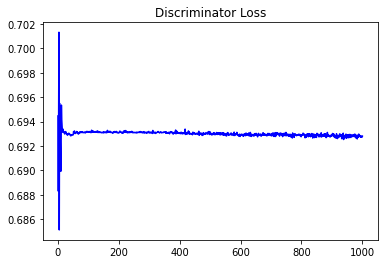

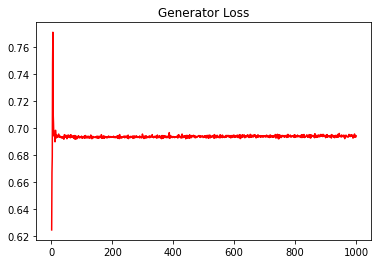

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11930096464898492


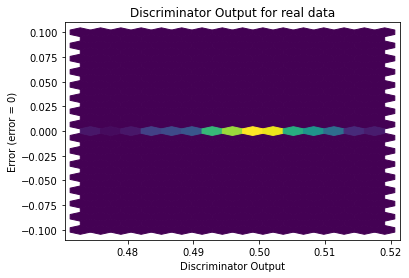

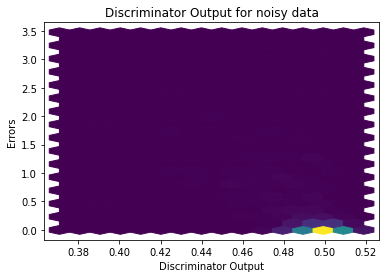

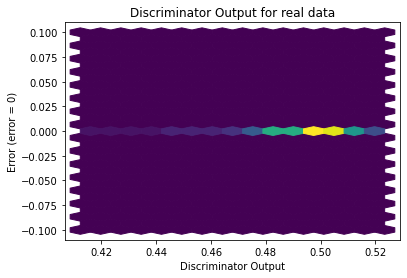

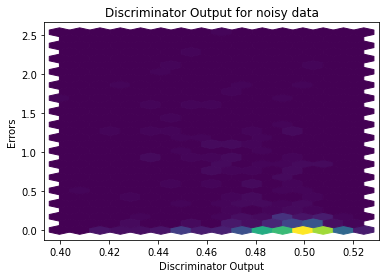

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


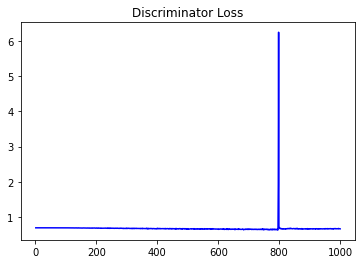

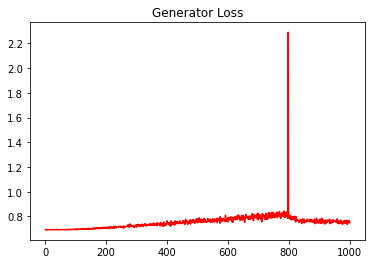

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11626777207978584


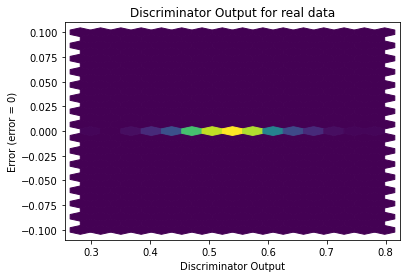

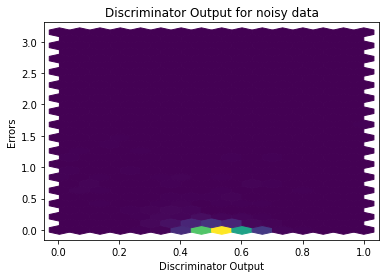

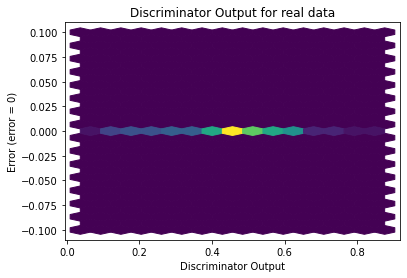

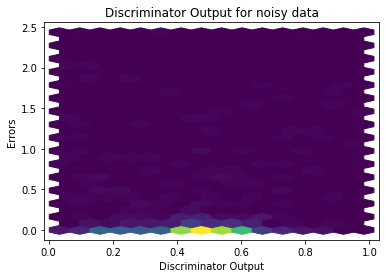

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0199]], requires_grad=True)
